# **Not an ideal network**

###Importing libraries ,  Downloading and preparing data for training

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:

#loading required libraries
import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist

In [4]:
#Load train and test data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


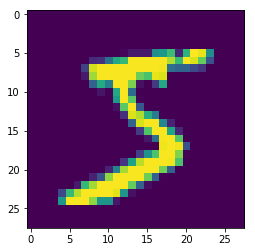

In [5]:
#check for shape and visualize one image
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
#reshape data
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:

#normalise pixel values from range o to 1 instead of 0 to 255 and covert it to float values
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
#check labels for train data
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices

#onehot encoding to convert y label data into matrix of values so as to prepare labels for training model
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
# as compared to previous one cell above run number 5 is now converted to [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.].
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Building Model


channel     Kernel           channel

                            28X28X1   | 3X3X1X32      -> 26X26X32
                            26X26X32  | 3X3X32X64     -> 24X24X64
                            24X24X64  | 3X3X64X128    -> 22X22X128

                            22X22X128 -maxpooling-> 11X11X128

                            11X11X128 | 3X3X128X256   -> 9X9X256
                            9X9X256   | 3X3X256X512   -> 7X7X512
                            7X7X512   | 3X3X512X1024  -> 5X5X1024
                            5X5X1024  | 3X3X1024X2048 -> 3X3X2048
                            3X3X2048  | 3X3X2048X10   -> 1X1X10

In [24]:

#import keras layers
from keras.layers import Activation, MaxPooling2D

#defining sequential model
model = Sequential() 

# Global receptive field, output channel size
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))#3, 26X26X32

model.add(Convolution2D(64, 3, 3, activation='relu'))#5, 24X24X64
model.add(Convolution2D(128, 3, 3, activation='relu'))#7 22X22X128

model.add(MaxPooling2D(pool_size=(2, 2)))#14, 11X11X128

model.add(Convolution2D(256, 3, 3, activation='relu'))#16, 9X9X256
model.add(Convolution2D(512, 3, 3, activation='relu'))#18, 7X7X512
model.add(Convolution2D(1024, 3, 3, activation='relu'))#20, 5X5X1024
model.add(Convolution2D(2048, 3, 3, activation='relu'))#22, 3x3X2048
model.add(Convolution2D(10, 3, 3, activation='relu'))#24, 1X1X10

model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 5, 5, 1024)        4719616   
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/l

###compile model

Based upon requirement 

set loss function- binary, categorical etc.

set optimizers- adam, rms_prop, momentum etc.

set metrics for visualisinng how model training is improving for each epoch.

In [25]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

W0816 18:29:50.580106 139984546256768 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0816 18:29:50.617855 139984546256768 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



###Train model for  loaded and prepared mnist data

set batchsize according to gpu capacity, number of epochs, verbose=1 to print the training information of each epoch.

Epoch- one cycle of training for whole dataset.

In [26]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0816 18:31:53.796982 139984546256768 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0816 18:31:53.898684 139984546256768 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
60000/60000 [==============================] - 220s 4ms/step - loss: 2.3026 - acc: 0.0988
Epoch 2/10
60000/60000 [==============================] - 217s 4ms/step - loss: 2.3026 - acc: 0.0987
Epoch 3/10
60000/60000 [==============================] - 216s 4ms/step - loss: 2.3026 - acc: 0.0987
Epoch 4/10
60000/60000 [==============================] - 216s 4ms/step - loss: 2.3026 - acc: 0.0987
Epoch 5/10
60000/60000 [==============================] - 217s 4ms/step - loss: 2.3026 - acc: 0.0987
Epoch 6/10
60000/60000 [==============================] - 216s 4ms/step - loss: 2.3026 - acc: 0.0987
Epoch 7/10
60000/60000 [==============================] - 216s 4ms/step - loss: 2.3026 - acc: 0.0987
Epoch 8/10
60000/60000 [==============================] - 216s 4ms/step - loss: 2.3026 - acc: 0.0987
Epoch 9/10
60000/60000 [==============================] - 216s 4ms/step - loss: 2.3026 - acc: 0.0987
Epoch 10/10
60000/60000 [==============================] - 216s 4ms/step - loss: 2.3026 - a

###Evaluate trained model model.evaluate- returns loss value and accuarcy score as mentioned in metrics value during model.compile.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [28]:
print(score)

[2.3025851249694824, 0.098]


### predict model values for test dataset and compare it with actual grountruth labels for manual understanding of how much model is working

In [0]:
y_pred = model.predict(X_test)

In [30]:
print(y_pred[:9])
print(y_test[:9])

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
[7 2 1 0 4 1 4 9 5]


###Not ideal network -


Network is not ideal as per observation-



*    **Loss value**  -  loss: 2.3026 - acc: 0.0987 As loss value is same for consecutive layers more then 5 for sure network/model is not learning/ understanding data.
*   **Predicted values** - predicted labels have all values has 0.1 no probalities of values specifing for classes.


Reason for not ideal network-


*   It is not required to use such large number of parameters for simple mnist dataset.
*   use of 2048 number of kernels and bring it down to 10 (3X3) may be causing loss of information and model may not be able to learn.
*   Idealy at 11X11 or 9X9 receptive field it is good to use maxpooling as edges of image will be recognised at this level here  maxpooling is used at 7X7 receptive field.
*   AS mnist dataset as whole image as digit it should ideal to use large kernel size at last layer for model to predict the digit. It would make sense if kernel is able to see large receptive field at once instead of 3X3.
*   It would be better to use 1X1  convolutional layer  after maxpooling for better converging of featuers/edges/textuers.
*   Use of relu activation function in last layer before flatten will not allow negative features to pass where as in our case we need to give importance for those features as well.






###Experiment model

**Accuracy- 99.17 %**

[0.036001140359249215, 0.9917]

In [11]:
from keras.layers import Activation, MaxPooling2D


model1 = Sequential()
model1.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) #3,  26X26X32
model1.add(Convolution2D(64, 3, 3, activation='relu'))#5, 24X24X64
model1.add(Convolution2D(128, 3, 3, activation='relu'))#7, 22X22X128

model1.add(MaxPooling2D(pool_size=(2, 2)))#14, 11X11X128

model1.add(Convolution2D(32, 1, 1, activation = 'relu'))#14 , 11X11X32
model1.add(Convolution2D(64, 3, 3, activation = 'relu'))#16, 9X9X64
model1.add(Convolution2D(256, 3, 3, activation = 'relu'))#18, 7X7X256

model1.add(Convolution2D(10, 7, 7))#28, 1X1X10


model1.add(Flatten())
model1.add(Activation('softmax'))
model1.summary()

model1.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

model1.fit(X_train, Y_train, batch_size=100, nb_epoch=10, verbose=1)

score = model1.evaluate(X_test, Y_test, verbose=1)
print(score)

W0816 19:24:54.951161 139898502793088 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
W0816 19:24:54.994594 139898502793088 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0816 19:24:55.002008 139898502793088 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        4128      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 256)         147712    
__________

W0816 19:24:55.469178 139898502793088 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
60000/60000 [==============================] - 16s 273us/step - loss: 0.1375 - acc: 0.9576
Epoch 2/10
60000/60000 [==============================] - 10s 161us/step - loss: 0.0386 - acc: 0.9886
Epoch 3/10
60000/60000 [==============================] - 10s 163us/step - loss: 0.0267 - acc: 0.9915
Epoch 4/10
60000/60000 [==============================] - 10s 163us/step - loss: 0.0197 - acc: 0.9938
Epoch 5/10
60000/60000 [==============================] - 10s 163us/step - loss: 0.0159 - acc: 0.9950
Epoch 6/10
60000/60000 [==============================] - 10s 162us/step - loss: 0.0141 - acc: 0.9956
Epoch 7/10
60000/60000 [==============================] - 10s 160us/step - loss: 0.0111 - acc: 0.9963
Epoch 8/10
60000/60000 [==============================] - 10s 159us/step - loss: 0.0095 - acc: 0.9972
Epoch 9/10
60000/60000 [==============================] - 10s 162us/step - loss: 0.0072 - acc: 0.9977
Epoch 10/10
10000/10000 [==============================] - 1s 97us/step
[0.0360011